In [1]:
# Importing librries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Extract the credit data set

In [3]:
credit_data = pd.read_csv('credit_data.csv')

Reading the file

In [4]:
credit_data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
credit_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
credit_data.shape

(1000, 10)

In [7]:
credit_data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

From above we can see that columns Saving accounts and Checking account has null values 

In [8]:
credit_data['Saving accounts'].describe()

count        817
unique         4
top       little
freq         603
Name: Saving accounts, dtype: object

Let's replace null value with little

In [9]:
credit_data['Saving accounts'].fillna('little', inplace = True)

In [10]:
credit_data['Checking account'].describe()

count        606
unique         3
top       little
freq         274
Name: Checking account, dtype: object

Let's replace null value with little

In [12]:
credit_data['Checking account'].fillna('little', inplace = True)

In [13]:
credit_data.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

Now there is no null value

In [14]:
credit_data.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,little,little,9055,36,education,good
6,53,male,2,own,quite rich,little,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,little,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


lets plot sctter plot for Age, Credit amount & Duration

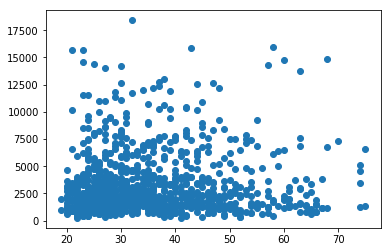

In [15]:
plt.scatter(credit_data['Age'], credit_data['Credit amount'])

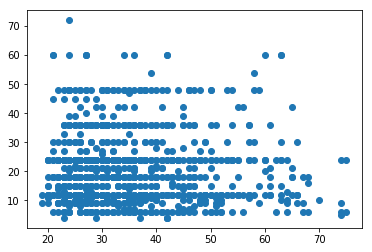

In [16]:
plt.scatter(credit_data['Age'], credit_data['Duration'])

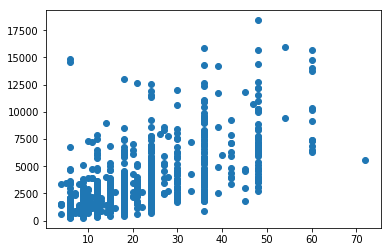

In [17]:
plt.scatter(credit_data['Duration'], credit_data['Credit amount'])

Initially lets assume 3 clusters 

In [19]:
km = KMeans(n_clusters = 3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
credit_data_pred = km.fit_predict(credit_data[['Duration', 'Credit amount','Age']])
credit_data_pred

array([0, 2, 0, 2, 2, 1, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1,
       2, 2, 0, 0, 0, 1, 2, 2, 2, 1, 2, 0, 0, 0, 0,

we can see 3 clusters as 0, 1, 2, now lets add this to data in new column as Cluster

In [21]:
credit_data['Cluster'] = credit_data_pred
credit_data.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Cluster
0,67,male,2,own,little,little,1169,6,radio/TV,good,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,2
2,49,male,1,own,little,little,2096,12,education,good,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,2
4,53,male,2,free,little,little,4870,24,car,bad,2
5,35,male,1,free,little,little,9055,36,education,good,1
6,53,male,2,own,quite rich,little,2835,24,furniture/equipment,good,0
7,35,male,3,rent,little,moderate,6948,36,car,good,2
8,61,male,1,own,rich,little,3059,12,radio/TV,good,0
9,28,male,3,own,little,moderate,5234,30,car,bad,2


Now we are dividing the data as per cluster 

In [23]:
credit_data0 = credit_data[credit_data.Cluster == 0]
credit_data1 = credit_data[credit_data.Cluster == 1]
credit_data2 = credit_data[credit_data.Cluster == 2]

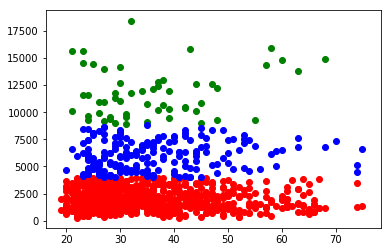

In [24]:
plt.scatter(credit_data0['Age'], credit_data0['Credit amount'], color = 'red')
plt.scatter(credit_data1['Age'], credit_data1['Credit amount'], color = 'green')
plt.scatter(credit_data2['Age'], credit_data2['Credit amount'], color = 'blue')

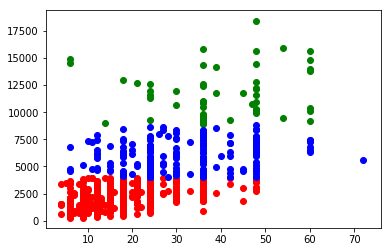

In [25]:
plt.scatter(credit_data0['Duration'], credit_data0['Credit amount'], color = 'red')
plt.scatter(credit_data1['Duration'], credit_data1['Credit amount'], color = 'green')
plt.scatter(credit_data2['Duration'], credit_data2['Credit amount'], color = 'blue')

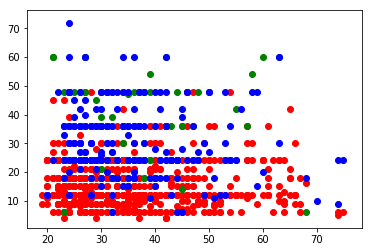

In [26]:
plt.scatter(credit_data0['Age'], credit_data0['Duration'], color = 'red')
plt.scatter(credit_data1['Age'], credit_data1['Duration'], color = 'green')
plt.scatter(credit_data2['Age'], credit_data2['Duration'], color = 'blue')

Now, here we can see that first 2 graph has perfect cluster but in above graph all the clusters are mixed up, to overcome this lets scale the data

In [27]:
scaler = MinMaxScaler()
scaler.fit(credit_data[['Age', 'Duration']])
credit_data[['Age', 'Duration']] = scaler.transform(credit_data[['Age', 'Duration']])
credit_data.head()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Cluster
0,0.857143,male,2,own,little,little,1169,0.029412,radio/TV,good,0
1,0.053571,female,2,own,little,moderate,5951,0.647059,radio/TV,bad,2
2,0.535714,male,1,own,little,little,2096,0.117647,education,good,0
3,0.464286,male,2,free,little,little,7882,0.558824,furniture/equipment,good,2
4,0.607143,male,2,free,little,little,4870,0.294118,car,bad,2


Above we can see that column Age and Duration is scaled

In [28]:
km = KMeans(n_clusters = 3)

In [29]:
credit_data_pred1 = km.fit_predict(credit_data[['Age', 'Duration']])
credit_data_pred1

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 0, 0, 2, 1, 0,
       1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2,
       1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 0, 2, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 2, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0,
       2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 2,
       2, 2, 0, 0, 1, 2, 0, 0, 2, 2, 1, 0, 0, 1, 0,

In [30]:
credit_data.drop('Cluster', axis = 1, inplace = True)

In [31]:
credit_data['Cluster'] = credit_data_pred1
credit_data.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Cluster
0,0.857143,male,2,own,little,little,1169,0.029412,radio/TV,good,0
1,0.053571,female,2,own,little,moderate,5951,0.647059,radio/TV,bad,2
2,0.535714,male,1,own,little,little,2096,0.117647,education,good,0
3,0.464286,male,2,free,little,little,7882,0.558824,furniture/equipment,good,2
4,0.607143,male,2,free,little,little,4870,0.294118,car,bad,0
5,0.285714,male,1,free,little,little,9055,0.470588,education,good,2
6,0.607143,male,2,own,quite rich,little,2835,0.294118,furniture/equipment,good,0
7,0.285714,male,3,rent,little,moderate,6948,0.470588,car,good,2
8,0.750000,male,1,own,rich,little,3059,0.117647,radio/TV,good,0
9,0.160714,male,3,own,little,moderate,5234,0.382353,car,bad,2


In [32]:
credit_data0 = credit_data[credit_data.Cluster == 0]
credit_data1 = credit_data[credit_data.Cluster == 1]
credit_data2 = credit_data[credit_data.Cluster == 2]

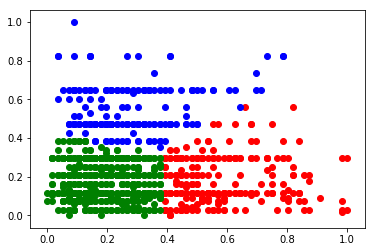

In [33]:
plt.scatter(credit_data0['Age'], credit_data0['Duration'], color = 'red')
plt.scatter(credit_data1['Age'], credit_data1['Duration'], color = 'green')
plt.scatter(credit_data2['Age'], credit_data2['Duration'], color = 'blue')

Greetings, here we get perfect clusters

Now, let's check for number of clusters ...

In [34]:
k_range = range(1,10)
sse=[]
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(credit_data[['Duration', 'Age', 'Credit amount']])
    sse.append(km.inertia_)

In [35]:
sse

[7959875700.074336,
 2405205061.0574913,
 1279677182.5833719,
 649636234.1827655,
 467478337.14455473,
 317535957.0686693,
 232489651.41514415,
 181581466.95667443,
 148604371.73543358]

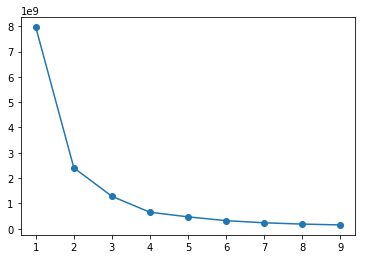

In [36]:
plt.plot(k_range, sse, marker = 'o')

From above elbow graph, we can say that our assuption is correct.